In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
import random

In [3]:
reddit = pd.read_csv('reddit_with_finbert.csv')
reddit.head()

,Unnamed: 0,date,text,ticker,prediction,sentiment_score
0,0,01-23-2021,mmm ya that fresh margin gonna 👀 much better c...,MMM,neutral,0.111170
1,1,02-06-2021,Mmm cheap as fuck,MMM,neutral,0.088873
2,2,02-02-2021,Mmm... YES. Call me dumb monkey again... Tell ...,MMM,neutral,0.011895
3,3,01-27-2021,High end hookers and blow 4 life,MMM,neutral,-0.186585
4,4,12-22-2020,MMM dog food CHWY gains,MMM,neutral,0.088646


In [12]:
reddit2 = reddit.groupby(['ticker', 'date'])['sentiment_score'].mean()
reddit2.head()

ticker  date      
A       01-02-2021   -0.220447
        01-03-2021    0.040378
        01-04-2021   -0.226696
        01-05-2020    0.053478
        01-05-2021    0.013845
Name: sentiment_score, dtype: float64

In [14]:
reddit2.to_csv('redditGroupBy.csv')

In [4]:
df = pd.read_csv('duberBigBoiNoText.csv').drop(['Unnamed: 0', 'ID'], axis=1)

In [5]:
df.describe()

,5dp,4dp,3dp,2dp,1dp,DayOf,twoWeeks,threeMonths,oneYear,sent_score
count,3.533714e+06,3.533714e+06,3.533714e+06,3.533714e+06,3.533714e+06,3.533714e+06,3.659930e+06,3.659930e+06,3.659930e+06,3.660000e+06
mean,3.848454e+02,3.860070e+02,3.871609e+02,3.879743e+02,3.892784e+02,3.901395e+02,3.945739e+02,4.240913e+02,5.018487e+02,2.680776e-02
std,4.795520e+02,4.818942e+02,4.842753e+02,4.864166e+02,4.886018e+02,4.899610e+02,4.946046e+02,5.369826e+02,6.036617e+02,3.519915e-01
min,9.439862e+00,9.025600e+00,9.025600e+00,9.483932e+00,9.193069e+00,9.193069e+00,9.369350e+00,9.295550e+00,7.717649e+00,-9.698334e-01
25%,2.787603e+01,2.813136e+01,2.815973e+01,2.831104e+01,2.831104e+01,2.831814e+01,2.932452e+01,3.367652e+01,3.745758e+01,-1.806532e-02
50%,4.771629e+01,4.760679e+01,4.760679e+01,4.712315e+01,4.750640e+01,4.712315e+01,4.695599e+01,5.094482e+01,7.888237e+01,2.767909e-02
75%,7.536700e+02,7.498700e+02,7.498700e+02,7.498700e+02,7.536700e+02,7.520000e+02,7.483000e+02,7.666100e+02,8.365200e+02,1.034214e-01
max,1.859100e+03,1.825930e+03,1.858660e+03,1.882680e+03,1.865290e+03,1.872910e+03,1.962940e+03,2.080020e+03,2.170220e+03,9.477532e-01


In [6]:
df['Positive'] = df['logit'].apply(lambda x: '0.' + x.replace(' ', '').split('0.')[1]).astype(float)
df['Negative'] = df['logit'].apply(lambda x: '0.' + x.replace(' ', '').split('0.')[2]).astype(float)
df['Neutral'] = df['logit'].apply(lambda x: '0.' + x.replace(' ', '').split('0.')[3][:-1]).astype(float)

In [7]:
df['prediction'] = df['prediction'].apply(lambda x: -1 if x == 'negative' else(0 if x == 'neutral' else 1))

In [8]:
df['twoWeeksBinary'] = (df['twoWeeks'] > df['DayOf']).apply(lambda x: 0 if x is False else 1)
df['threeMonthsBinary'] = (df['threeMonths'] > df['DayOf']).apply(lambda x: 0 if x is False else 1)
df['oneYearBinary'] = (df['oneYear'] > df['DayOf']).apply(lambda x: 0 if x is False else 1)
df['twoWeeksPct'] = 100 * (df['twoWeeks'] - df['DayOf']) / df['twoWeeks']
df['threeMonthsPct'] = 100 * (df['threeMonths'] - df['DayOf']) / df['threeMonths']
df['oneYearPct'] = 100 * (df['oneYear'] - df['DayOf']) / df['oneYear']

In [9]:
df['4dc'] = (df['4dp'] - df['5dp']) / df['5dp']
df['3dc'] = (df['3dp'] - df['4dp']) / df['4dp']
df['2dc'] = (df['2dp'] - df['3dp']) / df['3dp']
df['1dc'] = (df['1dp'] - df['2dp']) / df['2dp']
df['lastC'] = (df['DayOf'] - df['1dp']) / df['1dp']

In [10]:
df['4dc'] = df['4dc'].apply(lambda x: x * (1+ (.01 * (random.randint(-6, 6) ))))
df['3dc'] = df['3dc'].apply(lambda x: x * (1+ (.01 * (random.randint(-6, 6) ))))
df['2dc'] = df['2dc'].apply(lambda x: x * (1+ (.01 * (random.randint(-6, 6)))))
df['1dc'] = df['1dc'].apply(lambda x: x * (1+ (.01 * (random.randint(-6, 6) ))))
df['lastC'] = df['lastC'].apply(lambda x: x * (1+ (.01 * (random.randint(-6, 6) ))))

In [11]:
df.head()

,Date,Ticker,5dp,4dp,3dp,2dp,1dp,DayOf,twoWeeks,threeMonths,...,threeMonthsBinary,oneYearBinary,twoWeeksPct,threeMonthsPct,oneYearPct,4dc,3dc,2dc,1dc,lastC
0,2014-01-01 00:00:00,T,23.053471,23.226255,23.365816,23.379099,23.392389,23.365816,22.754858,23.630304,...,1,1,-2.684957,1.119276,1.476365,0.007495,0.006129,0.000557,0.000591,-0.001079
1,2014-01-01 00:00:00,T,23.053471,23.226255,23.365816,23.379099,23.392389,23.365816,22.754858,23.630304,...,1,1,-2.684957,1.119276,1.476365,0.007420,0.005648,0.000597,0.000551,-0.001159
2,2014-01-01 00:00:00,T,23.053471,23.226255,23.365816,23.379099,23.392389,23.365816,22.754858,23.630304,...,1,1,-2.684957,1.119276,1.476365,0.007645,0.006189,0.000534,0.000557,-0.001068
3,2014-01-01 00:00:00,T,23.053471,23.226255,23.365816,23.379099,23.392389,23.365816,22.754858,23.630304,...,1,1,-2.684957,1.119276,1.476365,0.007945,0.005708,0.000574,0.000591,-0.001102
4,2014-01-01 00:00:00,T,23.053471,23.226255,23.365816,23.379099,23.392389,23.365816,22.754858,23.630304,...,1,1,-2.684957,1.119276,1.476365,0.007120,0.005828,0.000597,0.000546,-0.001193


In [12]:
df.dropna(inplace=True)

In [13]:
# Split the target variables
XClass = df.iloc[:, ~df.columns.isin(['Ticker', 'twoWeeks', 'threeMonths', 'oneYear', 
                                 'twoWeeksBinary', 'threeMonthsBinary', 'oneYearBinary', 'logit', 'Date',
                                     '5dp', '4dp', '3dp', '2dp', '1dp', 'DayOf', 'twoWeeksPct', 'threeMonthsPct', 
                                     'oneYearPct'])]
XReg = df.iloc[:, ~df.columns.isin(['Ticker', 'twoWeeks', 'threeMonths', 'oneYear', 
                                 'twoWeeksBinary', 'threeMonthsBinary', 'oneYearBinary', 'logit', 'Date', 'twoWeeks',
                                   'threeMonths', 'oneYear'])]
targetShort = df.iloc[:, df.columns == 'twoWeeks']
targetShortBinary = df.iloc[:, df.columns=='twoWeeksBinary']
targetMedium = df.iloc[:, df.columns == 'threeMonths']
targetMediumBinary = df.iloc[:, df.columns == 'threeMonthsBinary']
targetLong = df.iloc[:, df.columns == 'oneYear']
targetLongBinary = df.iloc[:, df.columns == 'oneYearBinary']
targetShortPct = df.iloc[:, df.columns == 'twoWeeksPct']
targetMediumPct = df.iloc[:, df.columns == 'threeMonthsPct']
targetLongPct = df.iloc[:, df.columns == 'oneYearPct']

In [14]:
XClass.head()

,prediction,sent_score,Positive,Negative,Neutral,4dc,3dc,2dc,1dc,lastC
0,0,0.085485,0.103326,0.017841,0.878833,0.007495,0.006129,0.000557,0.000591,-0.001079
1,0,-0.200994,0.022652,0.223646,0.753702,0.007420,0.005648,0.000597,0.000551,-0.001159
2,0,0.167731,0.189353,0.021622,0.789024,0.007645,0.006189,0.000534,0.000557,-0.001068
3,1,0.587949,0.606869,0.018920,0.374211,0.007945,0.005708,0.000574,0.000591,-0.001102
4,0,0.048881,0.070034,0.021153,0.908813,0.007120,0.005828,0.000597,0.000546,-0.001193


In [15]:
test = df.groupby(['Ticker', 'Date'])['sent_score', 'Positive', 'Neutral', 'Negative', '5dp', '4dp', '3dp', '2dp', '1dp',
                                     'DayOf', 'twoWeeksBinary', 'twoWeeks', 'twoWeeksPct', 'threeMonths',
                                     'threeMonthsBinary', 'threeMonthsPct', 'oneYear', 'oneYearBinary', 'oneYearPct'].mean()

<ipython-input-15-7642747d7e8c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  test = df.groupby(['Ticker', 'Date'])['sent_score', 'Positive', 'Neutral', 'Negative', '5dp', '4dp', '3dp', '2dp', '1dp',


In [16]:
newX = test.iloc[:, ~test.columns.isin(['twoWeeksBinary', 'twoWeeks', 'twoWeeksPct', 'threeMonths', 'threeMonthsBinary',
                                       'threeMonthsPct', 'oneYear', 'oneYearBinary', 'oneYearPct'])]
newy = test.iloc[:, test.columns == 'oneYearBinary']

In [17]:
#Let us now split the dataset into train & test
from sklearn.model_selection import train_test_split

def trainSplit(X, target):
    X_train,X_test, y_train, y_test = train_test_split(X, target, test_size = 0.30, random_state=0)
    return X_train, y_train, X_test, y_test

In [18]:
# MODEL PERFORMANCE EVALUATION FUNCTIONS

def trainAcc(classifier):
    acc = round(classifier.score(X_train, y_train)*100, 2)
    print("Model accuracy is: ", acc, "%")
    return acc


def auc(model):
    # predict_proba returns Nx2 matrix, where 1st col is prob of 0 and 2nd column is prob of 1
    y_pred_proba = model.predict_proba(X_test)[:,1]
    #print(y_pred_proba)
    fpr, tpr, t = metrics.roc_curve(y_test,  y_pred_proba) # 
    #print(t)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC="+str(auc))
    plt.legend()
    plt.show()
    
    return y_pred_proba


def predict(model, y_pred_proba):
    #predict the model
    y_pred = model.predict(X_test)

    #Evaluate (Note that these default metrics provide values for y=1)
    evaluation_scores = pd.Series({'Model': " Random Forest Classifier ",
                     'ROC AUC Score' : metrics.roc_auc_score(y_test, y_pred_proba),
                     'Precision Score': metrics.precision_score(y_test, y_pred),
                     'Recall Score': metrics.recall_score(y_test, y_pred),
                     'Accuracy Score': metrics.accuracy_score(y_test, y_pred)})

    print(evaluation_scores)
    
    return y_pred

def classificationReport(y_pred):
    print(classification_report(y_test, y_pred))

def confusionMatrix(y_pred):

    cnf_matrix = confusion_matrix(y_test,y_pred)
    print(cnf_matrix)


    cf_df = pd.DataFrame(cnf_matrix,columns=['0','1'],index=['0','1'])
    sns.set(font_scale=1.4)
    plt.figure(figsize = (7,5))
    sns.heatmap(cf_df, annot=True,fmt='5.0f')
    plt.title('Confusion matrix of the classifier')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    plt.show()

In [444]:
newX = test.iloc[:, ~test.columns.isin(['twoWeeksBinary', 'twoWeeks', 'twoWeeksPct', 'threeMonths', 'threeMonthsBinary',
                                       'threeMonthsPct', 'oneYear', 'oneYearBinary', 'oneYearPct'])]
newy = test.iloc[:, test.columns == 'oneYearBinary']

## RANDOM FOREST

In [445]:
from sklearn.ensemble import RandomForestClassifier

#creating an instance of classifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,\
                                    criterion = 'entropy', max_leaf_nodes= 20,oob_score = True, n_jobs = -1 )

X_train, y_train, X_test, y_test = trainSplit(newX, newy)

# fit the model
model_RF = classifier.fit(X_train, y_train)

<ipython-input-445-76fa25a45843>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RF = classifier.fit(X_train, y_train)


Model accuracy is:  82.0 %


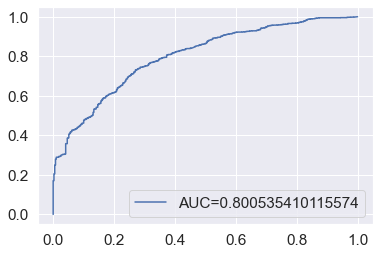

Model               Random Forest Classifier 
ROC AUC Score                        0.800535
Precision Score                      0.824853
Recall Score                         0.987813
Accuracy Score                       0.822382
dtype: object
              precision    recall  f1-score   support

           0       0.77      0.16      0.26       389
           1       0.82      0.99      0.90      1559

    accuracy                           0.82      1948
   macro avg       0.80      0.57      0.58      1948
weighted avg       0.81      0.82      0.77      1948

[[  62  327]
 [  19 1540]]


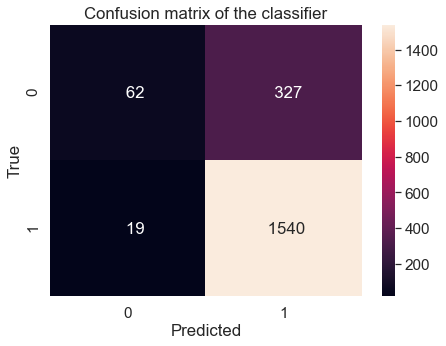

In [446]:
# RANDOM FORREST METRICS

acc = trainAcc(classifier)

y_pred_proba = auc(model_RF)

y_pred = predict(model_RF, y_pred_proba)

classificationReport(y_pred)

confusionMatrix(y_pred)



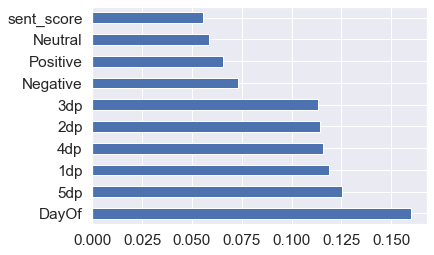

,,sent_score,Positive,Neutral,Negative,5dp,4dp,3dp,2dp,1dp,DayOf
Ticker,Date,,,,,,,,,,
MSFT,2016-01-31 00:00:00,0.037201,0.139530,0.758141,0.102329,47.716290,47.260017,47.606789,46.739880,47.506405,50.271385
PG,2016-02-07 00:00:00,0.016250,0.051460,0.913329,0.035211,70.505371,70.013428,69.236649,69.996147,69.650932,70.082474
WFC,2017-01-09 00:00:00,-0.037133,0.125139,0.712589,0.162272,47.972778,48.747513,48.791042,48.033710,47.911842,47.215450
DUK,2015-01-05 00:00:00,0.150512,0.261483,0.627545,0.110972,66.274551,67.062325,65.417252,64.521309,64.915237,63.980686
WMT,2014-02-22 00:00:00,-0.469666,0.096071,0.338191,0.565738,63.809345,64.173409,63.783924,63.377499,62.251335,61.912659


In [115]:
feature_importances = pd.Series(classifier.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh') #top 10 features

plt.show()
X_train.head()

## AdaBoost

In [447]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

AdaBoost = AdaBoostClassifier(n_estimators=100, base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.5, random_state=0)
#AdaBoost = AdaBoostClassifier(n_estimators=100, base_estimator=SVC(C=10,probability=True, kernel='linear'), learning_rate=0.5, random_state=0)

X_train, y_train, X_test, y_test = trainSplit(newX, newy)

model_AB = AdaBoost.fit(X_train, y_train)

C:\Users\Haig.Bernard\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Model accuracy is:  80.39 %


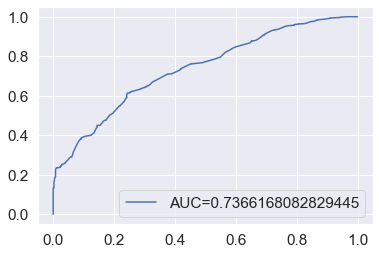

Model               Random Forest Classifier 
ROC AUC Score                        0.736617
Precision Score                      0.813978
Recall Score                         0.993586
Accuracy Score                       0.813142
dtype: object
              precision    recall  f1-score   support

           0       0.78      0.09      0.16       389
           1       0.81      0.99      0.89      1559

    accuracy                           0.81      1948
   macro avg       0.80      0.54      0.53      1948
weighted avg       0.81      0.81      0.75      1948

[[  35  354]
 [  10 1549]]


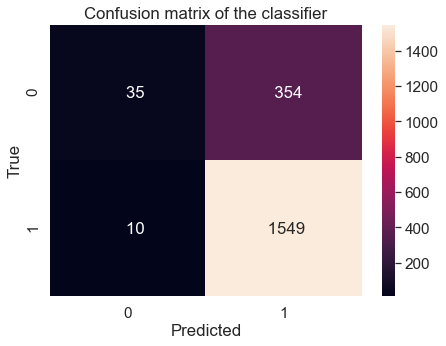

In [448]:

acc = trainAcc(AdaBoost)

y_pred_proba = auc(model_AB)

y_pred = predict(model_AB, y_pred_proba)

classificationReport(y_pred)

confusionMatrix(y_pred)


No handles with labels found to put in legend.


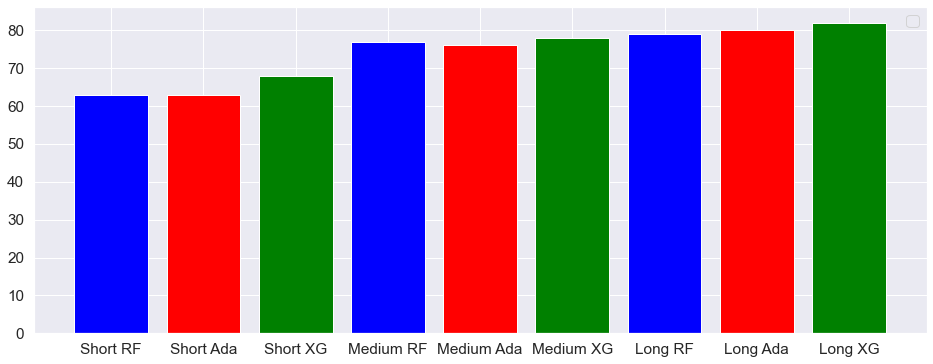

In [453]:
fig=plt.figure(figsize=(16,6))
plt.bar(['Short RF', 'Short Ada', 'Short XG', 'Medium RF', 'Medium Ada', 'Medium XG', 'Long RF', 'Long Ada', 'Long XG'],
        [63, 63, 68, 77, 76, 78, 79, 80, 82],
        color=['Blue', 'Red', 'Green', 'Blue', 'Red', 'Green', 'Blue', 'Red', 'Green'], bottom=0)
plt.legend()

In [417]:
newX = test.iloc[:, ~test.columns.isin(['twoWeeksBinary', 'twoWeeks', 'twoWeeksPct', 'threeMonths', 'threeMonthsBinary',
                                       'threeMonthsPct', 'oneYear', 'oneYearBinary', 'oneYearPct'])]
newy = test.iloc[:, test.columns == 'threeMonthsBinary']

# XGBoost

In [418]:
import os
import pandas as pd
import numpy as np

from numpy import sort

from xgboost import XGBClassifier
from xgboost import plot_tree
from xgboost import plot_importance

from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

import itertools

 
xg_model = XGBClassifier()
X_train, y_train, X_test, y_test = trainSplit(newX, newy)


model_xg = xg_model.fit(X_train, y_train)

C:\Users\Haig.Bernard\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Haig.Bernard\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[14:53:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [419]:
# import pickle
# # save model to file
# pickle.dump(model_xg, open("xgMed.dat", "wb"))

Model accuracy is:  96.52 %


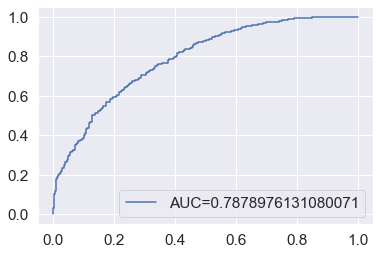

Model               Random Forest Classifier 
ROC AUC Score                        0.787898
Precision Score                      0.816339
Recall Score                         0.943487
Accuracy Score                       0.799795
dtype: object
              precision    recall  f1-score   support

           0       0.70      0.38      0.49       497
           1       0.82      0.94      0.88      1451

    accuracy                           0.80      1948
   macro avg       0.76      0.66      0.68      1948
weighted avg       0.79      0.80      0.78      1948

[[ 189  308]
 [  82 1369]]


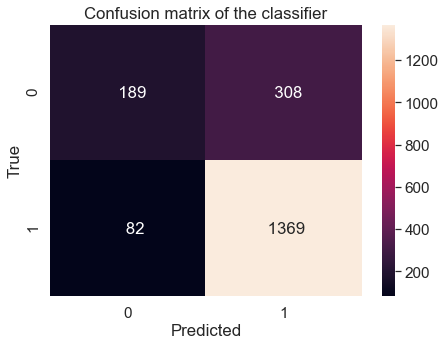

In [420]:
# train accuracy
acc = trainAcc(xg_model)

y_pred_proba = auc(model_xg)

y_pred = predict(model_xg, y_pred_proba)

classificationReport(y_pred)

confusionMatrix(y_pred)


In [421]:
testPred2 = testPred.join(y_test.reset_index())

In [422]:
testPred2.drop(['Ticker', 'Date'], axis=1, inplace=True)

In [424]:
testPred3 = testPred2.loc[testPred2['threeMonthsBinary'] == 1]
testPred3

,pred,test,threeMonthsBinary
1,1,12.775159,1
2,1,6.344612,1
3,1,2.543382,1
4,1,6.144373,1
5,1,4.335154,1
...,...,...,...
1942,1,15.602531,1
1943,1,4.215907,1
1945,1,4.486180,1
1946,1,6.634152,1


In [406]:
# year = y_test.mean()
yearBaseline = testPred3['test'].mean()


In [350]:
# week = y_test.mean()
weekBaseline = testPred3['test'].mean()

In [425]:
# month = y_test.mean()
monthBaseline = testPred3['test'].mean()

In [426]:
print(week, month, year)

twoWeeksPct    0.73527
dtype: float64 threeMonthsPct    4.554358
dtype: float64 oneYearPct    12.261137
dtype: float64


In [427]:
print(weekBaseline, monthBaseline, yearBaseline)

3.2763227869957787 8.080234628765265 18.491087334899618


No handles with labels found to put in legend.


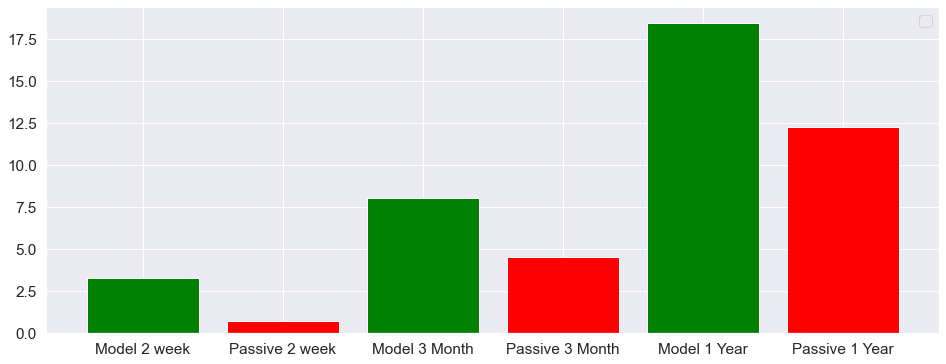

In [433]:
fig=plt.figure(figsize=(16,6))
plt.bar(['Model 2 week', 'Passive 2 week', 'Model 3 Month', 'Passive 3 Month', 'Model 1 Year', 'Passive 1 Year'],
        [weekBaseline, week, monthBaseline, month, yearBaseline, year],
        color=['Green', 'Red', 'Green', 'Red', 'Green', 'Red'])
plt.legend()

In [301]:
y_pred

array([[573.08328512],
       [ 55.20000089],
       [ 81.65411177],
       ...,
       [147.15242671],
       [ 68.48841733],
       [ 13.35081799]])

In [99]:
d = xg_model.get_booster().get_score(importance_type="gain")
dnew = dict(sorted(d.items(), key=lambda item: item[1]))
dnew

{'Neutral': 0.6796934427142859,
 'sent_score': 1.24640899925,
 'Positive': 2.3160340593,
 'Negative': 2.8856336255999997,
 'lastC': 1026.9143055716652,
 '4dc': 1046.460268592746,
 '2dc': 1092.0330302090615,
 '3dc': 1279.4432150139958,
 '1dc': 1363.0445084820026}

# Linear Regression

In [409]:
newX = test.iloc[:, ~test.columns.isin(['twoWeeksBinary', 'twoWeeks', 'twoWeeksPct', 'threeMonths', 'threeMonthsBinary',
                                       'threeMonthsPct', 'oneYear', 'oneYearBinary', 'oneYearPct'])]
newy = test.iloc[:, test.columns == 'threeMonthsPct']

In [410]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
X_train, y_train, X_test, y_test = trainSplit(newX, newy)
model_lr = linreg.fit(X_train, y_train)
model_lr.coef_

array([[ 3.28419755e+07, -3.39247912e+07, -1.08281731e+06,
         3.17591598e+07,  9.40993122e-04,  2.59124787e-02,
        -3.22796202e-02,  4.39327495e-02, -1.95048195e-02,
        -1.81726843e-02]])

In [386]:
oneYearBaseline = y_test.mean()
oneYearBaseline

oneYearPct    12.261137
dtype: float64

In [312]:
from sklearn.metrics import mean_squared_error

y_pred = model_lr.predict(X_test)

rsquared = model_lr.score(X_test, y_test)
print("R-Squared Value : ", rsquared)

mse = mean_squared_error(y_test, y_pred)
print("MSE : ", mse)


R-Squared Value :  0.008074672229877677
MSE :  18.782100039742517


In [34]:
model_lr.coef_

array([[ 1.35573838e+08, -1.44039090e+08, -8.46525166e+06,
         1.27108588e+08,  1.68494291e-02,  5.33526148e-02,
         1.07479767e-02, -6.82951545e-02,  2.46007298e-02,
        -3.08791673e-02]])

In [35]:
pd.DataFrame([0.10852, 0.027548, 0.863932, 0.12, 134.49843, 135.9484, 133.2938, 134.839996, 133.110001, 133.110001])

,0
0,0.108520
1,0.027548
2,0.863932
3,0.120000
4,134.498430
5,135.948400
6,133.293800
7,134.839996
8,133.110001
9,133.110001


In [36]:
X_test.describe()

,sent_score,Positive,Neutral,Negative,5dp,4dp,3dp,2dp,1dp,DayOf
count,1948.000000,1948.000000,1948.000000,1948.000000,1948.000000,1948.000000,1948.000000,1948.000000,1948.000000,1948.000000
mean,0.032979,0.152766,0.727448,0.119787,179.952032,179.983685,180.605115,180.736778,180.790773,181.091224
std,0.158171,0.107710,0.134448,0.099728,317.232342,317.599144,319.466005,320.040850,319.865432,320.670113
min,-0.947996,0.011644,0.028076,0.007949,9.439862,9.025600,9.025600,9.483932,9.193069,9.193069
25%,-0.009617,0.093063,0.690425,0.057831,35.756003,35.684801,35.727517,35.664083,35.802874,35.588090
50%,0.027901,0.142374,0.733715,0.111741,59.804247,60.078415,60.221743,59.946676,60.392622,60.637791
75%,0.071600,0.174926,0.791399,0.140862,101.849739,102.258533,102.478909,102.788677,102.450136,102.729771
max,0.922994,0.944751,0.953523,0.959640,1696.199951,1693.219971,1696.199951,1718.729980,1718.729980,1696.199951


In [37]:
model_lr.predict(pd.DataFrame(X_test.iloc[0]).T)

array([[14.64903554]])

In [293]:
(((y_pred - y_test)**2)**.5).mean()

twoWeeks    5.999345
dtype: float64

In [298]:
type(y_pred[0][0])

numpy.float64

In [411]:
y_pred = pd.DataFrame(y_pred)

In [412]:
y_test2 = y_test.reset_index()

In [413]:
y_test2.drop(['Ticker', 'Date'], axis=1, inplace=True)

In [414]:
y_test2

,threeMonthsPct
0,-2.729317
1,12.775159
2,6.344612
3,2.543382
4,6.144373
...,...
1943,4.215907
1944,-9.959655
1945,4.486180
1946,6.634152


In [415]:
testPred = y_pred.join(y_test2)
testPred.columns = ['pred', 'test']

In [416]:
testPred

,pred,test
0,0,-2.729317
1,1,12.775159
2,1,6.344612
3,1,2.543382
4,1,6.144373
...,...,...
1943,1,4.215907
1944,0,-9.959655
1945,1,4.486180
1946,1,6.634152


In [169]:
testPred = testPred.sort_values(by='pred', ascending=False)

In [170]:
testPred['test'].head(2).mean()

7.835011710109965

In [171]:
testPred['test'].mean()

12.261136974701593

In [172]:
returns = []
for i in range(1, len(testPred) + 1):
    returns.append(testPred['test'].head(i).mean())

In [173]:
avg = [testPred['test'].mean()] * (len(testPred))
avg

[12.261136974701593,
 12.261136974701593,
 12.261136974701593,
 12.261136974701593,
 12.261136974701593,
 12.261136974701593,
 12.261136974701593,
 12.261136974701593,
 12.261136974701593,
 12.261136974701593,
 12.261136974701593,
 12.261136974701593,
 12.261136974701593,
 12.261136974701593,
 12.261136974701593,
 12.261136974701593,
 12.261136974701593,
 12.261136974701593,
 12.261136974701593,
 12.261136974701593,
 12.261136974701593,
 12.261136974701593,
 12.261136974701593,
 12.261136974701593,
 12.261136974701593,
 12.261136974701593,
 12.261136974701593,
 12.261136974701593,
 12.261136974701593,
 12.261136974701593,
 12.261136974701593,
 12.261136974701593,
 12.261136974701593,
 12.261136974701593,
 12.261136974701593,
 12.261136974701593,
 12.261136974701593,
 12.261136974701593,
 12.261136974701593,
 12.261136974701593,
 12.261136974701593,
 12.261136974701593,
 12.261136974701593,
 12.261136974701593,
 12.261136974701593,
 12.261136974701593,
 12.261136974701593,
 12.261136974

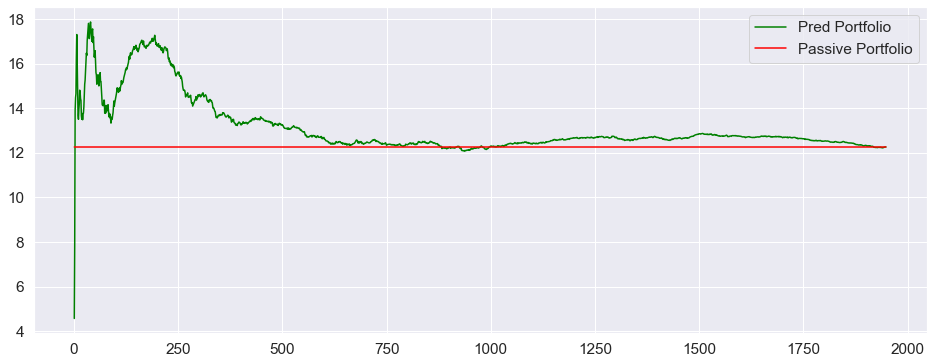

In [159]:
fig=plt.figure(figsize=(16,6))
plt.plot(range(1, len(y_pred)+1), returns,  label='Pred Portfolio', c='Green')
plt.plot(range(1, len(y_pred)+1), avg, label = 'Passive Portfolio', c='Red')
plt.legend()

In [294]:
pickle.dump(model_lr, open('lr_short.sav', 'wb'))

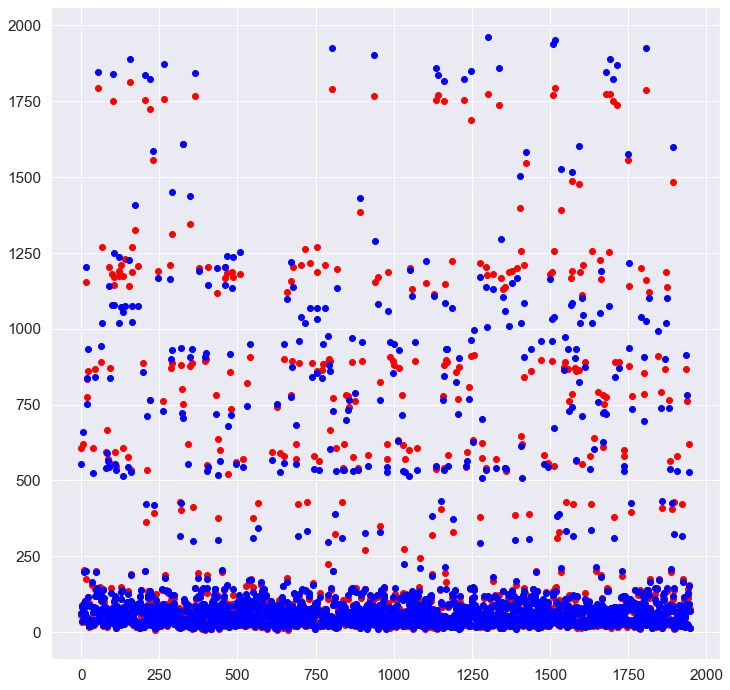

In [190]:
# Compare predictions to actual values across the test dataset
plt.figure(figsize=(12,12))
plt.scatter(range(0,len(X_test)), y_pred, c='red')
plt.scatter(range(0,len(X_test)), y_test, c='blue')
plt.show()

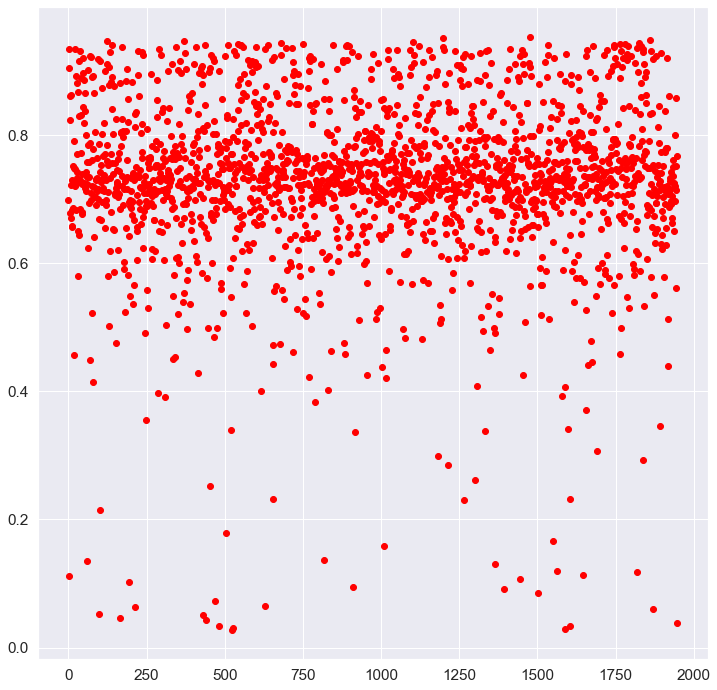

In [323]:
plt.figure(figsize=(12,12))
plt.scatter(range(0,len(X_test)), X_test['Neutral'], c='red')
plt.show()

# Random Forest Regressor

In [156]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(random_state = 0, n_estimators = 100,\
                                    criterion = 'mse', max_leaf_nodes= 20,oob_score = True, n_jobs = -1)
X_train, y_train, X_test, y_test = trainSplit(newX, newy)
model_regr = regr.fit(X_train, y_train["twoWeeksPct"].ravel())


In [157]:
y_pred = model_regr.predict(X_test)

rsquared = model_regr.score(X_test, y_test)
print("R-Squared Value : ", rsquared)

mse = mean_squared_error(y_test, y_pred)
print("MSE : ", mse)


R-Squared Value :  0.10222968666645349
MSE :  16.999275414862083


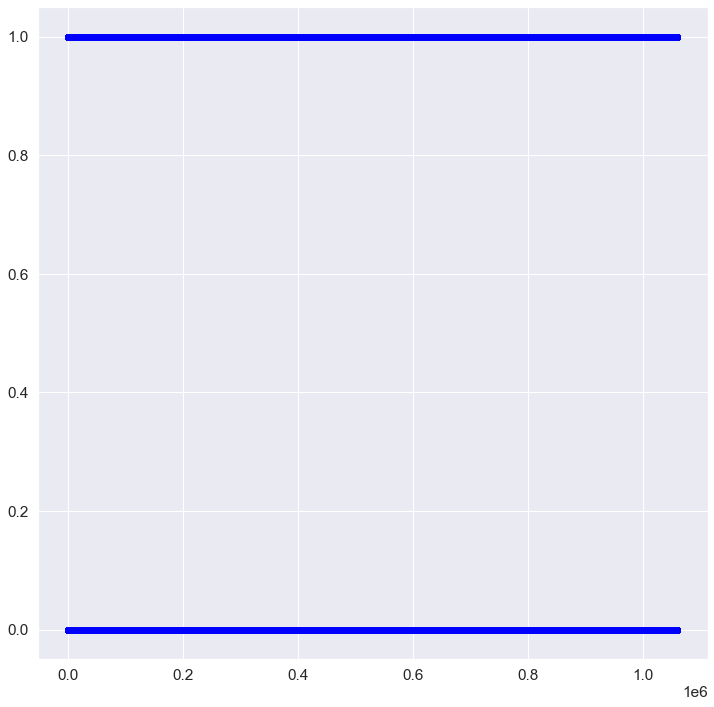

In [161]:
# Compare predictions to actual values across the test dataset
plt.figure(figsize=(12,12))
plt.scatter(range(0,len(X_test)), y_pred, c='red')
plt.scatter(range(0,len(X_test)), y_test, c='blue')
plt.show()

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()
X_train, y_train, X_test, y_test = trainSplit(targetShortBinary)
model_logr = logr.fit(X_train, y_train["twoWeeksBinary"].ravel())


In [ ]:
acc = trainAcc(logr)

y_pred_proba = auc(model_logr)

y_pred = predict(model_logr, y_pred_proba)

classificationReport(y_pred)

confusionMatrix(y_pred)


# Ridge Regression

In [89]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=4)
X_train, y_train, X_test, y_test = trainSplit(XReg, targetShort)
model_ridge = ridge.fit(X_train, y_train)


In [90]:
y_pred = model_ridge.predict(X_test)

rsquared = model_ridge.score(X_test, y_test)
print("R-Squared Value : ", rsquared)

mse = mean_squared_error(y_test, y_pred)
print("MSE : ", mse)


R-Squared Value :  0.9955177017036534
MSE :  1103.4806921630545


# XGBoost Regression

In [ ]:
from xgboost import XGBRegressor

xg_model = XGBRegressor()
X_train, y_train, X_test, y_test = trainSplit(targetShort)
model_xg = model.fit(X_train, y_train)


# Neural Networks

In [108]:
#ANN
# Import packages
from __future__ import print_function

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import pandas as pd

import os
import re
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)


from datetime import datetime
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
#import keras.backend as K
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Utility Functions

def plot_decision_boundary(func, X, y, figsize=(9, 6)):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    c = func(ab)
    cc = c.reshape(aa.shape)

    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    fig, ax = plt.subplots(figsize=figsize)
    contour = plt.contourf(aa, bb, cc, cmap=cm, alpha=0.8)
    
    ax_c = fig.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    ax_c.set_ticks([0, 0.25, 0.5, 0.75, 1])
    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
    plt.xlim(amin, amax)
    plt.ylim(bmin, bmax)

def plot_multiclass_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))
    cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    Z = model.predict_classes(np.c_[xx.ravel(), yy.ravel()], verbose=0)
    Z = Z.reshape(xx.shape)
    fig = plt.figure(figsize=(8, 8))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
def plot_data(X, y, figsize=None):
    if not figsize:
        figsize = (8, 6)
    plt.figure(figsize=figsize)
    plt.plot(X[y==0, 0], X[y==0, 1], 'or', alpha=0.5, label=0)
    plt.plot(X[y==1, 0], X[y==1, 1], 'ob', alpha=0.5, label=1)
    plt.xlim((min(X[:, 0])-0.1, max(X[:, 0])+0.1))
    plt.ylim((min(X[:, 1])-0.1, max(X[:, 1])+0.1))
    plt.legend()


def whatishistory(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    print(historydf.describe())
    
def plot_loss_accuracy(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, max(1, historydf.values.max())))
    loss = history.history['loss'][-1]
    acc = history.history['accuracy'][-1]
    plt.title('Loss: %.3f, Accuracy: %.3f' % (loss, acc))

def plot_loss(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, historydf.values.max()))
    plt.title('Loss: %.3f' % history.history['loss'][-1])
    
def plot_confusion_matrix(model, X, y):
    y_pred = model.predict_classes(X, verbose=0)
    plt.figure(figsize=(8, 6))
    sns.heatmap(pd.DataFrame(confusion_matrix(y, y_pred)), annot=True, fmt='d', cmap='YlGnBu', alpha=0.8, vmin=0)
    plt.title('Confusion matrix of the classifier')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
def plot_compare_histories(history_list, name_list, plot_accuracy=True):
    dflist = []
    for history in history_list:
        h = {key: val for key, val in history.history.items() if not key.startswith('val_')}
        dflist.append(pd.DataFrame(h, index=history.epoch))

    historydf = pd.concat(dflist, axis=1)

    metrics = dflist[0].columns
    idx = pd.MultiIndex.from_product([name_list, metrics], names=['model', 'metric'])
    historydf.columns = idx
    
    plt.figure(figsize=(6, 8))

    ax = plt.subplot(211)
    historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
    plt.title("Loss")
    
    if plot_accuracy:
        ax = plt.subplot(212)
        historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
        plt.title("Accuracy")
        plt.xlabel("Epochs")

    plt.tight_layout()
    
def make_sine_wave():
    c = 3
    num = 2400
    step = num/(c*4)
    np.random.seed(0)
    x0 = np.linspace(-c*np.pi, c*np.pi, num)
    x1 = np.sin(x0)
    noise = np.random.normal(0, 0.1, num) + 0.1
    noise = np.sign(x1) * np.abs(noise)
    x1  = x1 + noise
    x0 = x0 + (np.asarray(range(num)) / step) * 0.3
    X = np.column_stack((x0, x1))
    y = np.asarray([int((i/step)%2==1) for i in range(len(x0))])
    return X, y

def make_multiclass(N=500, D=2, K=3):
    """
    N: number of points per class
    D: dimensionality
    K: number of classes
    """
    np.random.seed(0)
    X = np.zeros((N*K, D))
    y = np.zeros(N*K)
    for j in range(K):
        ix = range(N*j, N*(j+1))
        # radius
        r = np.linspace(0.0,1,N)
        # theta
        t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = j
    fig = plt.figure(figsize=(6, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu, alpha=0.8)
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    return X, y

 

In [ ]:
import numpy
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_shape=(3948,), activation="relu"))
    model.add(Dense(12, activation="relu", kernel_regularizer=regularizers.l1(.01)))
    model.add(Dense(24, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [107]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier()
X_train, y_train, X_test, y_test = trainSplit(X, targetShortBinary)
model_nn = model.fit(X_train, y_train)


C:\Users\Haig.Bernard\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Model accuracy is:  75.27 %


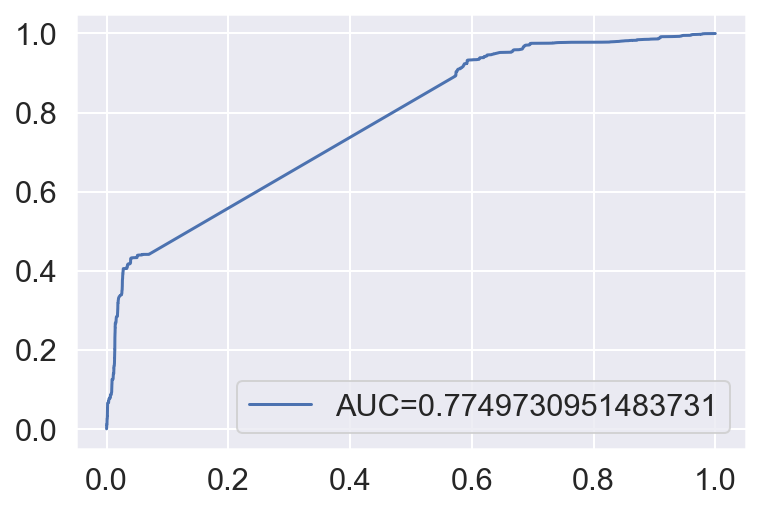

Model               Random Forest Classifier 
ROC AUC Score                            0.77
Precision Score                          0.75
Recall Score                             0.93
Accuracy Score                           0.75
dtype: object
              precision    recall  f1-score   support

           0       0.75      0.40      0.52    357013
           1       0.75      0.93      0.83    703102

    accuracy                           0.75   1060115
   macro avg       0.75      0.67      0.68   1060115
weighted avg       0.75      0.75      0.73   1060115

[[141559 215454]
 [ 46570 656532]]


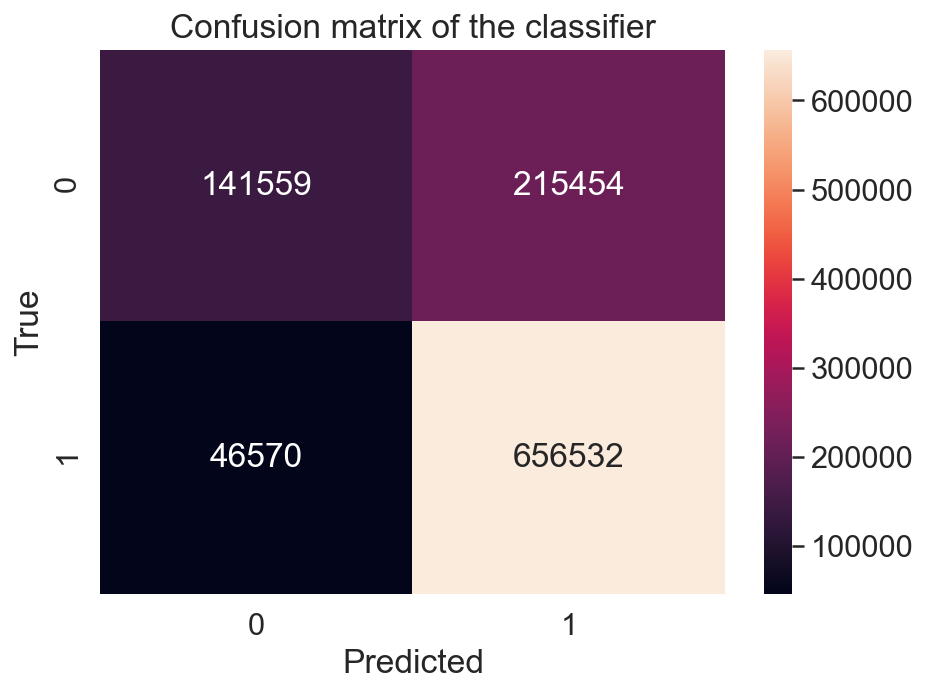

In [109]:
# train accuracy
acc = trainAcc(model)

y_pred_proba = auc(model_nn)

y_pred = predict(model_nn, y_pred_proba)

classificationReport(y_pred)

confusionMatrix(y_pred)


In [146]:
groupedByTicker = df.groupby(['Ticker', 'Date'])

meanSentimentByDay = groupedByTicker.mean()[['sent_score']]

meanSentimentByDay

sent_score
Ticker Date                           
AAPL   2014-01-01 00:00:00    0.027505
       2014-01-02 00:00:00   -0.011950
       2014-01-03 00:00:00    0.024887
       2014-01-04 00:00:00    0.009600
       2014-01-05 00:00:00    0.107033
...                                ...
XOM    2017-01-09 00:00:00    0.006163
       2017-01-31 00:00:00   -0.054244
       2018-01-08 00:00:00   -0.016160
       2018-01-09 00:00:00    0.038084
       2018-01-10 00:00:00    0.146589

[6492 rows x 1 columns]

332

In [147]:
test = df.groupby(['Ticker', 'Date'])['sent_score', 'Positive', 'Neutral', 'Negative', '5dp', '4dp', '3dp', '2dp', '1dp',
                                     'DayOf', 'twoWeeksBinary', 'twoWeeks', 'twoWeeksPct'].mean()

<ipython-input-147-e2f85531fe66>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  test = df.groupby(['Ticker', 'Date'])['sent_score', 'Positive', 'Neutral', 'Negative', '5dp', '4dp', '3dp', '2dp', '1dp',


In [148]:
test

sent_score  Positive   Neutral  Negative  \
Ticker Date                                                            
AAPL   2014-01-01 00:00:00    0.027505  0.120830  0.785846  0.093325   
       2014-01-02 00:00:00   -0.011950  0.122833  0.742384  0.134783   
       2014-01-03 00:00:00    0.024887  0.135254  0.754378  0.110368   
       2014-01-04 00:00:00    0.009600  0.120025  0.769550  0.110425   
       2014-01-05 00:00:00    0.107033  0.245686  0.615662  0.138652   
...                                ...       ...       ...       ...   
XOM    2017-01-09 00:00:00    0.006163  0.069661  0.866841  0.063498   
       2017-01-31 00:00:00   -0.054244  0.130561  0.684635  0.184804   
       2018-01-08 00:00:00   -0.016160  0.062241  0.859357  0.078402   
       2018-01-09 00:00:00    0.038084  0.066382  0.905321  0.028297   
       2018-01-10 00:00:00    0.146589  0.170802  0.804986  0.024213   

                                  5dp        4dp        3dp        2dp  \
Ticker Date                                                              
AAPL   2014-01-01 00:00:00  18.137894  18.060902  17.940950  17.819733   
       2014-01-02 00:00:00  18.060902  17.940950  17.819733  17.642519   
       2014-01-03 00:00:00  17.940950  17.819733  17.642519  17.849323   
       2014-01-04 00:00:00  17.940950  17.819733  17.642519  17.849323   
       2014-01-05 00:00:00  17.940950  17.819733  17.642519  17.849323   
...                               ...        ...        ...        ...   
XOM    2017-01-09 00:00:00  73.781693  74.296684  73.479240  72.383888   
       2017-01-31 00:00:00  69.555557  69.759926  69.972466  69.898888   
       2018-01-08 00:00:00  70.972908  72.152405  73.569473  73.671303   
       2018-01-09 00:00:00  72.152405  73.569473  73.671303  73.611900   
       2018-01-10 00:00:00  73.569473  73.671303  73.611900  73.942833   

                                  1dp      DayOf  twoWeeksBinary   twoWeeks  \
Ticker Date                                                                   
AAPL   2014-01-01 00:00:00  17.642519  17.849323               0  17.732878   
       2014-01-02 00:00:00  17.849323  17.598297               1  17.633934   
       2014-01-03 00:00:00  17.598297  17.211735               0  17.201874   
       2014-01-04 00:00:00  17.598297  17.211735               1  17.469124   
       2014-01-05 00:00:00  17.598297  17.211735               1  17.469124   
...                               ...        ...             ...        ...   
XOM    2017-01-09 00:00:00  72.343018  71.149574               0  69.457466   
       2017-01-31 00:00:00  69.367546  68.574638               0  68.319046   
       2018-01-08 00:00:00  73.611900  73.942833               1  74.884720   
       2018-01-09 00:00:00  73.942833  73.628876               1  74.927162   
       2018-01-10 00:00:00  73.628876  73.043365               1  75.122322   

                            twoWeeksPct  
Ticker Date                              
AAPL   2014-01-01 00:00:00    -0.656665  
       2014-01-02 00:00:00     0.202093  
       2014-01-03 00:00:00    -0.057325  
       2014-01-04 00:00:00     1.473394  
       2014-01-05 00:00:00     1.473394  
...                                 ...  
XOM    2017-01-09 00:00:00    -2.436179  
       2017-01-31 00:00:00    -0.374116  
       2018-01-08 00:00:00     1.257783  
       2018-01-09 00:00:00     1.732731  
       2018-01-10 00:00:00     2.767429  

[6492 rows x 13 columns]

In [ ]:
new_df = pd.merge(df, meanSentimentByDay, "right", on=["Ticker", "Date"], suffixes=("", "_avg"))
new_df.drop(columns=['sent_score', 'logit', 'prediction'], inplace=True)
new_df.drop_duplicates(inplace=True)
new_df.reset_index(inplace=True, drop=True)
new_df.dropna(inplace=True)


In [125]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of grid search 
param_grid = {
    'booster': ['gbtree', 'dart'],
    'eta': [0.1, 0.2, 0.3, 0.4],
    'max_depth': [2,4,6,8,10],
    'min_child_weight': [1,2,3, 4]
}

# Create a RF model
xg = XGBClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = xg, param_grid = param_grid, cv=3, verbose = 1)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 160 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[00:30:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:31:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:32:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:34:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [ ]:
best_grid = grid_search.best_estimator_
print("Grid search accuracy:", round(best_grid.score(X_train, y_train) * 100, 2),"%" )

print("Test sample Grid search accuracy:", round(best_grid.score(X_test, y_test) * 100, 2),"%" )




In [ ]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of grid search 
param_grid = {
    'copy_X': [True, False],
    'fit_intercept': [True, False],
    'n_jobs': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    'normalize': [True, False]
}

# Create a RF model
lr = LinearRegression()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = lr, param_grid = param_grid, 
                          cv = 2,  verbose = 1)


In [ ]:
X_train, y_train, X_test, y_test = trainSplit(targetShort)
